# Chicago Crime Data 
* Jacob Wang
* Coding Dojo Data Science Project 4 - Part 1 
* 2/4/2023

## Task
* Your task is to answer a series of questions about trends in crimes in Chicago for a reporter for the local newspaper.

#### **Questions:** 

1) Comparing Police Districts:
    * Which district has the most crimes? Which has the least?
    
    
2) Crimes Across the Years:
    * Is the total number of crimes increasing or decreasing across the years?
    * Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?
    
    
3) Comparing Months:
    * What months have the most crime? What months have the least?
    

### Imports/Load data

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns


import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa

In [2]:
folder = "Data/Chicago/"
crime_files = sorted(glob.glob(folder+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])

In [3]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7727169 entries, 0 to 17811
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 663.2+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,3206463,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.0,18.0,41.735507,-87.690095
1,1358218,01/01/2001 01:00:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,312,3.0,NaN,41.778744,-87.612135
2,1323691,01/01/2001 01:00:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,41.866694,-87.688513
3,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
4,1317937,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877
...,...,...,...,...,...,...,...,...,...,...,...,...
17807,12965291,01/27/2023 12:48:00 PM,CONCEALED CARRY LICENSE VIOLATION,ARMED WHILE UNDER THE INFLUENCE,STREET,True,False,1821,18.0,27.0,41.909828,-87.638553
17808,12969720,01/27/2023 12:49:00 PM,THEFT,FROM BUILDING,APARTMENT,False,False,2521,25.0,31.0,41.935410,-87.756571
17809,12964887,01/27/2023 12:49:00 AM,OTHER OFFENSE,OBSCENE TELEPHONE CALLS,POLICE FACILITY / VEHICLE PARKING LOT,False,False,1225,12.0,28.0,41.872333,-87.679608
17810,12965449,01/27/2023 12:50:00 PM,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,STREET,False,False,1914,19.0,46.0,41.966244,-87.658013


## 1.) Comparing Police Districts:
* Which district has the most crimes? Which has the least?

#### Set datetime as index

In [4]:
df1 = df.copy()
date_format = "%m/%d/%Y %H:%M:%S %p"
df1['Datetime'] = pd.to_datetime(df1['Date'], format=date_format)
df1 = df1.sort_values('Datetime')
df1 = df1.set_index('Datetime')
df1.head(3)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,,,
2001-01-01 01:00:00,3206463,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.0,18.0,41.735507,-87.690095
2001-01-01 01:00:00,1311503,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.0,NaN,41.931374,-87.648819
2001-01-01 01:00:00,6808288,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,41.822551,-87.615632


In [5]:
district = df1.groupby('District').size()
district

District
1.0     311538
2.0     365580
3.0     391894
4.0     438675
5.0     342757
6.0     451641
7.0     447904
8.0     519409
9.0     377875
10.0    332932
11.0    496434
12.0    382186
14.0    299250
15.0    331921
16.0    258265
17.0    222950
18.0    346420
19.0    346573
20.0    136425
21.0         4
22.0    253211
24.0    233182
25.0    439864
31.0       232
dtype: int64

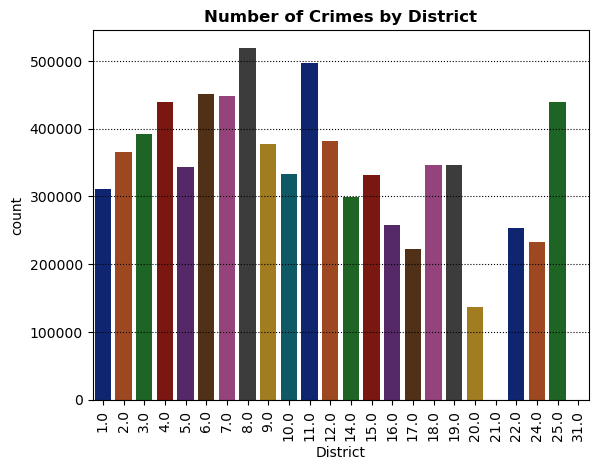

In [6]:
fig = sns.countplot(data=df1, x='District',palette='dark');
plt.xticks(rotation=90);
plt.grid(which= 'major',axis= 'y',color= 'k', ls=':')
plt.title('Number of Crimes by District', fontweight = 'bold');

### Results: 
* The district with the *most* crimes committed was **District 8** with 519,409 crimes
* The district with the *least* crimes committed was **District 21** with only 4 crimes 

## 2.) Crimes Across the Years:
* Is the total number of crimes increasing or decreasing across the years?
* Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [7]:
def thousands(x,pos):
    new_x = x/1_000
    return f"{new_x:,.0f}K"

In [8]:
ts_years = df1.resample('Y').size()
ts_years

Datetime
2001-12-31    485865
2002-12-31    486799
2003-12-31    475979
2004-12-31    469418
2005-12-31    453767
2006-12-31    448172
2007-12-31    437080
2008-12-31    427160
2009-12-31    392816
2010-12-31    370490
2011-12-31    351958
2012-12-31    336253
2013-12-31    307452
2014-12-31    275722
2015-12-31    264731
2016-12-31    269769
2017-12-31    269033
2018-12-31    268733
2019-12-31    261197
2020-12-31    212013
2021-12-31    208359
2022-12-31    236591
2023-12-31     17812
Freq: A-DEC, dtype: int64

In [9]:
# find which year had most crime
max_crime = ts_years.idxmax()
max_crime

Timestamp('2002-12-31 00:00:00', freq='A-DEC')

In [10]:
# find which year had least crime
low_crime = ts_years.idxmin()
low_crime

Timestamp('2023-12-31 00:00:00', freq='A-DEC')

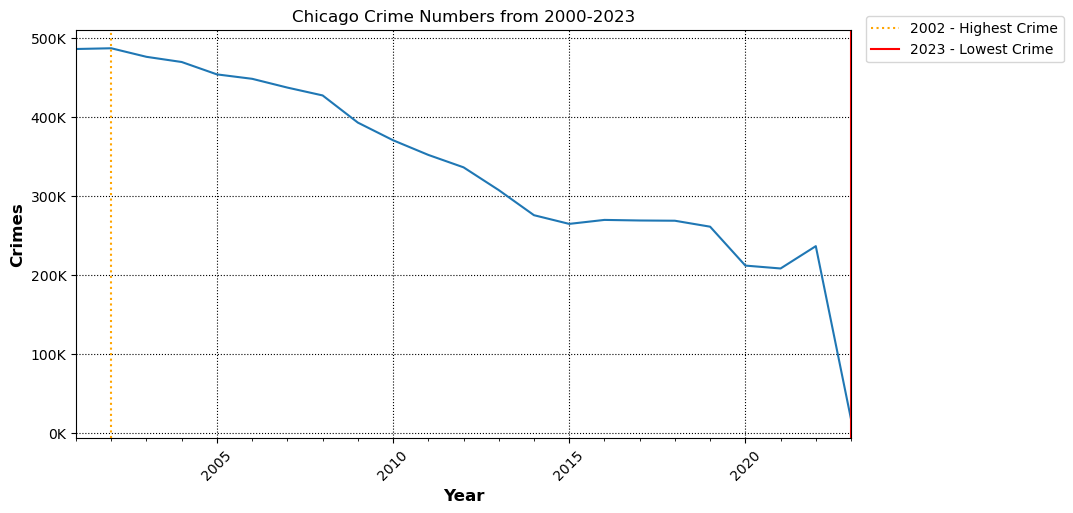

In [11]:
# plot crimes over time 
fig, ax = plt.subplots(figsize = (10,6))
ts_years.plot(ax = ax, title = 'Chicago Crime Numbers from 2000-2023')

ax.set_ylabel('Crimes', fontsize= 12, fontweight= 'bold')
ax.set_xlabel('Year', fontsize= 12, fontweight= 'bold')
ax.grid(which= 'major',axis= 'y',color= 'k', ls=':')
ax.grid(which= 'major',axis= 'x',color= 'k', ls=':')
ax.yaxis.set_major_formatter(thousands)
ax.axvline(max_crime, ls= ':',color= 'orange',label= '2002 - Highest Crime')
ax.axvline(low_crime, ls= '-',color= 'red',label= '2023 - Lowest Crime')
ax.legend(bbox_to_anchor=(1.01, 1.05));


fig.autofmt_xdate(rotation=45, ha= 'center')

We can clearly tell from the visual that crime has decreased over the years. Crime was highest in 2002, and has steadily decreased to its lowest rate in 2023.  

### Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [12]:
## First, resample the data as annual 
df_year = df1.groupby('Primary Type').resample('A').size().reset_index()
df_year

,Primary Type,Datetime,0
0,ARSON,2001-12-31,1011
1,ARSON,2002-12-31,1032
2,ARSON,2003-12-31,955
3,ARSON,2004-12-31,778
4,ARSON,2005-12-31,691
...,...,...,...
745,WEAPONS VIOLATION,2019-12-31,6339
746,WEAPONS VIOLATION,2020-12-31,8431
747,WEAPONS VIOLATION,2021-12-31,8978
748,WEAPONS VIOLATION,2022-12-31,8725


In [13]:
## can pivot the result to have the datetime as the index and the crime as the columns
years_ts = df_year.pivot(index='Datetime',columns='Primary Type')
years_ts.head()

0                             \
Primary Type   ARSON  ASSAULT  BATTERY BURGLARY   
Datetime                                          
2001-12-31    1011.0  31384.0  93458.0  26014.0   
2002-12-31    1032.0  31523.0  94153.0  25623.0   
2003-12-31     955.0  29477.0  88379.0  25156.0   
2004-12-31     778.0  28850.0  87136.0  24564.0   
2005-12-31     691.0  27066.0  83964.0  25503.0   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Datetime                                                             
2001-12-31                                 1.0              1779.0   
2002-12-31                                 0.0              1808.0   
2003-12-31                                 0.0              1572.0   
2004-12-31                                 0.0              1545.0   
2005-12-31                                 0.0              1528.0   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Datetime                                                                 
2001-12-31           55857.0                    30.0           13241.0   
2002-12-31           55941.0                    26.0           13880.0   
2003-12-31           55011.0                    39.0           14807.0   
2004-12-31           53164.0                    34.0           15913.0   
2005-12-31           54548.0                    29.0           16655.0   

                                 ...                             \
Primary Type DECEPTIVE PRACTICE  ... OTHER OFFENSE PROSTITUTION   
Datetime                         ...                              
2001-12-31              14941.0  ...       29663.0       6026.0   
2002-12-31              13729.0  ...       32600.0       6408.0   
2003-12-31              13459.0  ...       31147.0       6214.0   
2004-12-31              13255.0  ...       29532.0       7476.0   
2005-12-31              13590.0  ...       28028.0       6124.0   

                                                                         \
Primary Type PUBLIC INDECENCY PUBLIC PEACE VIOLATION RITUALISM  ROBBERY   
Datetime                                                                  
2001-12-31                9.0                 2750.0       8.0  18441.0   
2002-12-31                8.0                 2457.0       2.0  18523.0   
2003-12-31                6.0                 2430.0       2.0  17332.0   
2004-12-31                9.0                 2495.0       1.0  15978.0   
2005-12-31                4.0                 2730.0       2.0  16047.0   

                                                              
Primary Type SEX OFFENSE STALKING    THEFT WEAPONS VIOLATION  
Datetime                                                      
2001-12-31        2240.0    204.0  99274.0            4276.0  
2002-12-31        2173.0    200.0  98331.0            4281.0  
2003-12-31        2077.0    247.0  98876.0            4211.0  
2004-12-31        1805.0    215.0  95463.0            4298.0  
2005-12-31        1816.0    192.0  85684.0            4106.0  

[5 rows x 36 columns]

In [14]:
years_ts.columns = years_ts.columns.droplevel(0)
years_ts.columns

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE',
       'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION',
       'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT',
       'NARCOTICS', 'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type')

In [15]:
### Substract to get delta crmes
delta_crime_yrs = years_ts.loc['2022-12-31'] - years_ts.loc['2001-12-31']

In [16]:
# drop nans/sort
delta_crime_yrs = delta_crime_yrs.sort_values(ascending=False)
delta_crime_yrs = delta_crime_yrs.dropna()
delta_crime_yrs

Primary Type
WEAPONS VIOLATION                     4449.0
CRIMINAL SEXUAL ASSAULT               1510.0
DECEPTIVE PRACTICE                     606.0
STALKING                               223.0
CONCEALED CARRY LICENSE VIOLATION      176.0
HOMICIDE                                47.0
OBSCENITY                               29.0
OTHER NARCOTIC VIOLATION                 1.0
PUBLIC INDECENCY                        -4.0
INTERFERENCE WITH PUBLIC OFFICER       -15.0
INTIMIDATION                          -100.0
OFFENSE INVOLVING CHILDREN            -377.0
ARSON                                 -587.0
KIDNAPPING                            -817.0
GAMBLING                              -925.0
SEX OFFENSE                          -1053.0
LIQUOR LAW VIOLATION                 -1434.0
PUBLIC PEACE VIOLATION               -2043.0
PROSTITUTION                         -5743.0
MOTOR VEHICLE THEFT                  -6153.0
CRIMINAL TRESPASS                    -9025.0
ROBBERY                              -9475

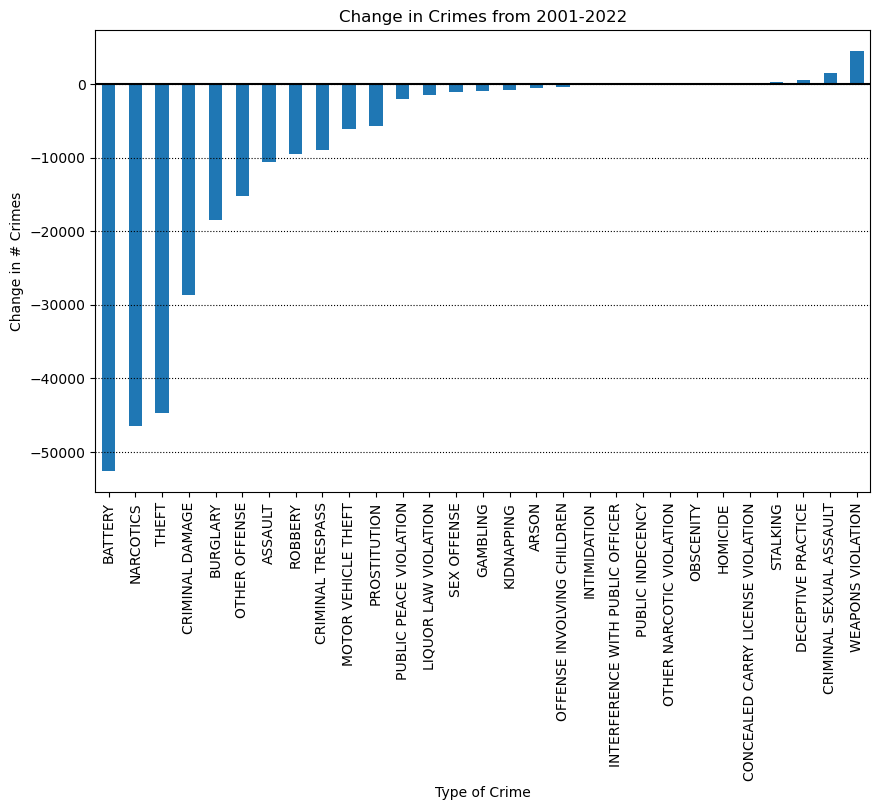

In [17]:
# plot changes in crime over the years 2001-2022
ax = delta_crime_yrs.sort_values().plot(kind='bar',figsize=(10,6),
                                       ylabel='Change in # Crimes', xlabel = 'Type of Crime',
                                       title='Change in Crimes from 2001-2022')

ax.grid(which= 'major',axis= 'y',color= 'k', ls=':')
ax.axhline(0,color='k');

### Results: 
* While we have observed that crime overall has decreased over the years, there are some specific crimes that have increased slightly during that time. These crimes include: 
    * WEAPONS VIOLATION                     
    * CRIMINAL SEXUAL ASSAULT             
    * DECEPTIVE PRACTICE                    
    * STALKING                                   
    * HOMICIDE                                
    * OBSCENITY                               
    * OTHER NARCOTIC VIOLATION     
    
    

## 3.) Comparing Months:
* What months have the most crime? What months have the least?

In [18]:
eda_df = df1.reset_index()
eda_df['month'] = eda_df['Datetime'].dt.month_name()
eda_df

,Datetime,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,month
0,2001-01-01 01:00:00,3206463,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.0,18.0,41.735507,-87.690095,January
1,2001-01-01 01:00:00,1311503,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.0,NaN,41.931374,-87.648819,January
2,2001-01-01 01:00:00,6808288,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,41.822551,-87.615632,January
3,2001-01-01 01:00:00,1333483,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.0,NaN,41.677371,-87.683218,January
4,2001-01-01 01:00:00,1311049,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.0,NaN,41.954010,-87.709858,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7727164,2023-01-27 12:48:00,12965291,01/27/2023 12:48:00 PM,CONCEALED CARRY LICENSE VIOLATION,ARMED WHILE UNDER THE INFLUENCE,STREET,True,False,1821,18.0,27.0,41.909828,-87.638553,January
7727165,2023-01-27 12:49:00,12969720,01/27/2023 12:49:00 PM,THEFT,FROM BUILDING,APARTMENT,False,False,2521,25.0,31.0,41.935410,-87.756571,January
7727166,2023-01-27 12:49:00,12964887,01/27/2023 12:49:00 AM,OTHER OFFENSE,OBSCENE TELEPHONE CALLS,POLICE FACILITY / VEHICLE PARKING LOT,False,False,1225,12.0,28.0,41.872333,-87.679608,January
7727167,2023-01-27 12:50:00,12965449,01/27/2023 12:50:00 PM,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,STREET,False,False,1914,19.0,46.0,41.966244,-87.658013,January


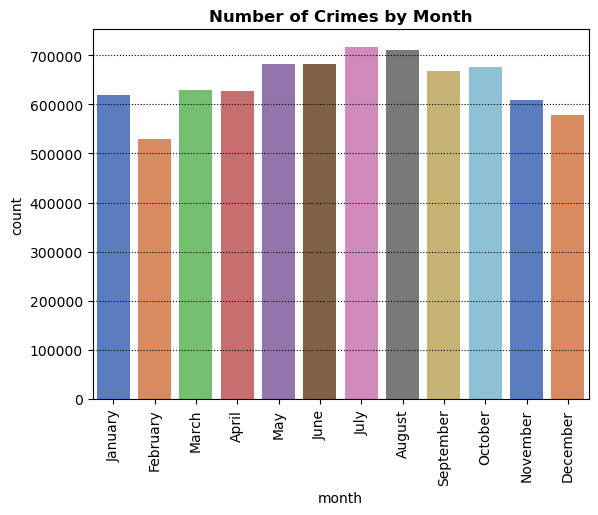

In [28]:
# plot crimes by month
fig = sns.countplot(data=eda_df, x='month',palette='muted');
plt.xticks(rotation=90);
plt.grid(which= 'major',axis= 'y',color= 'k', ls=':')
plt.title('Number of Crimes by Month', fontweight = 'bold');

### Results:
* According to our visual, the month with the highest crime is July
* The month that typically has the lowest crime is February

## 4.) Which US holiday has the largest number of crimes?

In [20]:
!pip install holidays
import holidays
import datetime as dt
from holidays import country_holidays

In [21]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [22]:
## Saving both holiday types as columns
eda_df["US Holiday"] = eda_df['Datetime'].map(us_holidays.get)
eda_df

,Datetime,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,month,US Holiday
0,2001-01-01 01:00:00,3206463,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.0,18.0,41.735507,-87.690095,January,New Year's Day
1,2001-01-01 01:00:00,1311503,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.0,NaN,41.931374,-87.648819,January,New Year's Day
2,2001-01-01 01:00:00,6808288,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,41.822551,-87.615632,January,New Year's Day
3,2001-01-01 01:00:00,1333483,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.0,NaN,41.677371,-87.683218,January,New Year's Day
4,2001-01-01 01:00:00,1311049,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.0,NaN,41.954010,-87.709858,January,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7727164,2023-01-27 12:48:00,12965291,01/27/2023 12:48:00 PM,CONCEALED CARRY LICENSE VIOLATION,ARMED WHILE UNDER THE INFLUENCE,STREET,True,False,1821,18.0,27.0,41.909828,-87.638553,January,None
7727165,2023-01-27 12:49:00,12969720,01/27/2023 12:49:00 PM,THEFT,FROM BUILDING,APARTMENT,False,False,2521,25.0,31.0,41.935410,-87.756571,January,None
7727166,2023-01-27 12:49:00,12964887,01/27/2023 12:49:00 AM,OTHER OFFENSE,OBSCENE TELEPHONE CALLS,POLICE FACILITY / VEHICLE PARKING LOT,False,False,1225,12.0,28.0,41.872333,-87.679608,January,None
7727167,2023-01-27 12:50:00,12965449,01/27/2023 12:50:00 PM,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,STREET,False,False,1914,19.0,46.0,41.966244,-87.658013,January,None


In [23]:
eda_df['US Holiday'].unique()

array(["New Year's Day", None, 'Martin Luther King Jr. Day',
       "Washington's Birthday", 'Memorial Day', 'Independence Day',
       'Labor Day', 'Columbus Day', 'Veterans Day',
       'Veterans Day (Observed)', 'Thanksgiving', 'Christmas Day',
       'Independence Day (Observed)', 'Christmas Day (Observed)',
       "New Year's Day (Observed)",
       'Juneteenth National Independence Day (Observed)',
       'Juneteenth National Independence Day'], dtype=object)

In [24]:
## Calculate which holiday had most crime
eda_df['US Holiday'].value_counts()

New Year's Day                                     33371
Independence Day                                   22662
Labor Day                                          22151
Memorial Day                                       21121
Columbus Day                                       20912
Veterans Day                                       20412
Martin Luther King Jr. Day                         18566
Washington's Birthday                              17595
Thanksgiving                                       14783
Christmas Day                                      12404
Independence Day (Observed)                         5884
Veterans Day (Observed)                             5842
New Year's Day (Observed)                           5496
Christmas Day (Observed)                            4921
Juneteenth National Independence Day                1450
Juneteenth National Independence Day (Observed)     1396
Name: US Holiday, dtype: int64

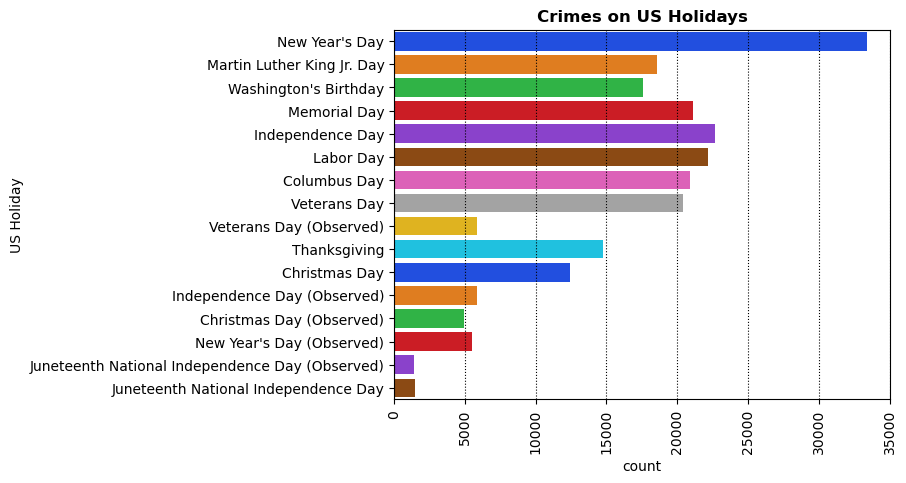

In [25]:
# plot crimes by holiday
fig = sns.countplot(data=eda_df, y='US Holiday',palette='bright');
plt.xticks(rotation=90);
plt.grid(which= 'major',axis= 'x',color= 'k', ls=':')
plt.title('Crimes on US Holidays', fontweight = 'bold');

### Results: 
* Crimes are highest on New Year's Day, followed by Independence Day. 